In [1]:
import pandas as pd
import numpy as np
import statistics as stat
from lxml import html
import requests
from bs4 import BeautifulSoup
import csv
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')


%matplotlib inline

In [2]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry


def requests_retry_session(
    retries=30,
    backoff_factor=0.3,
    status_forcelist=(500, 502, 504),
    session=None,
):
    session = session or requests.Session()
    retry = Retry(
        total=retries,
        read=retries,
        connect=retries,
        backoff_factor=backoff_factor,
        status_forcelist=status_forcelist,
    )
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    return session

In [3]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    text_nt = re.sub(clean, '', text)
    return text_nt

In [4]:
def sentiment_comment_text(url):
    """Takes Lobste'rs URL and returns sentiment score and text of post comments"""
    page = requests_retry_session().get(url)
    #brew the soup
    soup = BeautifulSoup(page.text)
    #find all comments on Lobste.rs post
    comment_text = str(soup.find_all('p'))
    #get rid of html tags
    comment_text = remove_html_tags(comment_text)
    sia = SentimentIntensityAnalyzer()
    #run the sentiment analysis
    sentiment_score = sia.polarity_scores(comment_text)['compound']
    return pd.Series((comment_text, sentiment_score ))

In [5]:
df = pd.read_csv('C:/Users/sam_a/Downloads/uf-data-analytics-project/lobsters_full_2017_cleaned.csv', index_col='Unnamed: 0')

In [6]:
#add new engagement score column
df["engagement_score"] = df["upvotes"] + df["downvotes"] + df["comment_count"]

In [7]:
df.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,...,vim,virtualization,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity,engagement_score
000yx1,2,https://lobste.rs/s/000yx1/analysis_soviet_smo...,2017-02-10 14:00:25,NaN,0,22,https://lobste.rs/s/000yx1,"['hardware', 'historical', 'science']",Analysis of Soviet smoke detector plutonium,22,...,0.0,0.0,0.0,0.0,0.0,14,4,2017,0.053848,24
001m4w,1,https://lobste.rs/s/001m4w/twitter_already_usi...,2014-11-17 13:20:20,NaN,0,3,https://lobste.rs/s/001m4w,"['networking', 'privacy']",Twitter Already Using Verizon's ID to Track Users,3,...,0.0,0.0,0.0,0.0,0.0,13,0,2014,0.249789,4
002cgs,2,https://lobste.rs/s/002cgs/resilience_ruby,2017-04-18 18:02:19,NaN,0,12,https://lobste.rs/s/002cgs,"['programming', 'ruby']",Resilience in Ruby,12,...,0.0,0.0,0.0,0.0,0.0,18,1,2017,0.102904,14
006hat,0,https://lobste.rs/s/006hat/hacking_linksys_wmb54g,2012-07-13 15:28:05,NaN,0,7,https://lobste.rs/s/006hat,"['hardware', 'security']",Hacking the Linksys WMB54G,7,...,0.0,0.0,0.0,0.0,0.0,15,4,2012,0.030448,7
00adts,1,https://lobste.rs/s/00adts/dying_art_mental_ma...,2016-01-13 10:10:04,NaN,0,7,https://lobste.rs/s/00adts,['math'],The Dying Art of Mental Math Tricks,7,...,0.0,0.0,0.0,0.0,0.0,10,2,2016,0.049901,8


In [8]:
#save original df
og_df = df

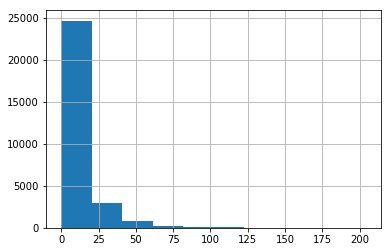

In [9]:
df['engagement_score'].hist()

username
0                       75
0x2ba22e11               6
0xfg                     4
1amzave                 46
355E3B                2130
4ad                     78
ANTStorm                 4
AdamGibbins             74
Adir                     8
AlexGilleran             6
AliasIO                 17
Alodium                  2
AmirRachum              68
AntonioMeireles          3
Aranje                   2
Arrgh                   16
Astyan                   3
AutomaticHourglass       8
Axman6                 117
Benedmunds               1
BonacaTalk               2
Bonbonia                 3
Boojum                   9
BruceM                2579
Bystroushaak            93
C-Keen                 210
CS                      13
Cale                     6
Caustic                  7
Charlotteis              1
                      ... 
yvonne-chen             16
z3bra                   29
za_creature              2
zacbrown               289
zachwill                 4
zack               

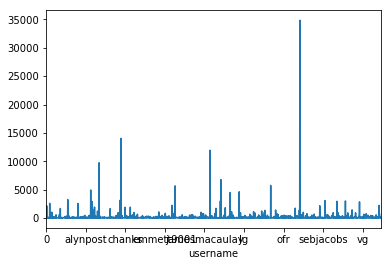

In [10]:
#Chart engagement score by usn
total_engagement_score_by_usn = df.groupby('username')['engagement_score'].sum()
print(total_engagement_score_by_usn)
total_engagement_score_by_usn.plot()

username
0                     5
1amzave               8
355E3B              160
AdamGibbins          11
AmirRachum           12
Axman6                7
BruceM              161
Bystroushaak          9
C-Keen               11
ChrisShort           15
Curiositry           25
DRMacIver            53
DanTup               23
Dawny33             104
DocSavage             8
Don_Pellegrino        7
DrM                  26
Ecto5                 7
EthanHeilman          8
FRIGN                 5
Flisk                 6
FooBarWidget          5
GMW                   5
Gargi                 6
GeoffWozniak         36
InakaESI              6
InkyHarmonics         7
Irene                 9
JeffreyBaird          6
JeremyMorgan         87
                   ... 
wally                67
weakforce             9
wetzler               8
whbboyd              22
whyrusleeping         5
wiedi                12
wikimatze             8
wildlyinaccurate      5
wje                   5
wmoxam               10
worr   

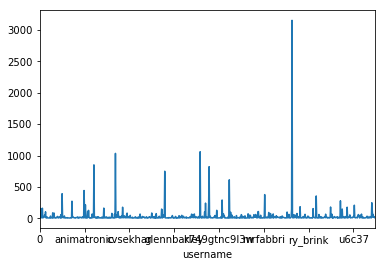

In [11]:
#chart number of posts by usn
total_posts_by_usn = df.groupby('username')['engagement_score'].count()
df= total_posts_by_usn
total_posts_by_usn = df.drop(df[df < 5].index)
print(total_posts_by_usn)
total_posts_by_usn.plot()

In [12]:
#Find average post engagement per username
avg_engagement_by_user = total_engagement_score_by_usn / total_posts_by_usn
avg_engagement_by_user = avg_engagement_by_user.dropna()
print(avg_engagement_by_user)

username
0                   15.000000
1amzave              5.750000
355E3B              13.312500
AdamGibbins          6.727273
AmirRachum           5.666667
Axman6              16.714286
BruceM              16.018634
Bystroushaak        10.333333
C-Keen              19.090909
ChrisShort          13.200000
Curiositry          11.200000
DRMacIver           19.056604
DanTup              12.173913
Dawny33              8.817308
DocSavage            8.500000
Don_Pellegrino       9.571429
DrM                 11.769231
Ecto5                4.428571
EthanHeilman         7.750000
FRIGN               31.000000
Flisk               20.000000
FooBarWidget         3.800000
GMW                 10.000000
Gargi                5.500000
GeoffWozniak        15.305556
InakaESI             2.000000
InkyHarmonics        4.714286
Irene               23.777778
JeffreyBaird         5.166667
JeremyMorgan         6.735632
                      ...    
wally               10.970149
weakforce            4.777778
w

In [13]:
#find the standard deviation of the engagement score
stdev_avg_engagement = stat.stdev(avg_engagement_by_user)
print(stdev_avg_engagement)

6.654214133456158


In [14]:
#mean of th engagement score
mean_avg_engagement = stat.mean(avg_engagement_by_user)
print(mean_avg_engagement)

11.150824360938802


In [15]:
#find standard deviation levels
one_eng_stdev = stdev_avg_engagement + mean_avg_engagement
two_eng_stdev = (stdev_avg_engagement*2) + mean_avg_engagement
three_eng_stdev = (stdev_avg_engagement*3) + mean_avg_engagement

In [16]:
df= avg_engagement_by_user

In [17]:
stdev1df = df.drop(df[df < one_eng_stdev].index)
stdev2df = df.drop(df[df < two_eng_stdev].index)
stdev3df = df.drop(df[df < three_eng_stdev].index)

username
C-Keen             19.090909
DRMacIver          19.056604
FRIGN              31.000000
Flisk              20.000000
Irene              23.777778
JordiGH            19.904762
SirSkidmore        20.500000
UkiahSmith         20.777778
a-109-107          26.500000
acatton            24.800000
akurilin           19.142857
albino             18.600000
alek               29.400000
algernon           19.260870
andrewnez          18.916667
ane                24.250000
apc                32.000000
aphyr              38.111111
arcatan            24.933333
arrdem             30.909091
awal               25.631579
bill               20.166667
bmercer            23.888889
brinker            25.705882
brynet             38.250000
burntsushi         19.090909
caius              46.000000
chilicuil          20.333333
cmhamill           19.875000
conroy             30.222222
                     ...    
mattgreenrocks     23.000000
meskarune          33.222222
michaelochurch     21.086207
mostl

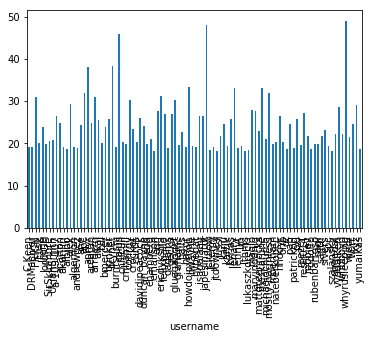

In [18]:
print(stdev1df)
stdev1df.plot(kind= 'bar')

username
FRIGN              31.000000
a-109-107          26.500000
acatton            24.800000
alek               29.400000
apc                32.000000
aphyr              38.111111
arcatan            24.933333
arrdem             30.909091
awal               25.631579
brinker            25.705882
brynet             38.250000
caius              46.000000
conroy             30.222222
davidjpeacock      26.125000
enn                27.666667
ericdykstra        31.333333
felixgallo         27.000000
gecko              27.000000
gluegadget         30.200000
howdoipython       33.444444
isagalaev          26.400000
iv                 26.428571
japesinator        48.000000
kaiju              24.500000
kyrias             25.714286
lenary             33.000000
maqio              27.916667
marvindanig        27.625000
meskarune          33.222222
mostly-harmless    31.833333
nhooyr             26.400000
pab                24.666667
pxi                25.833333
resir014           27.125000
vyoda

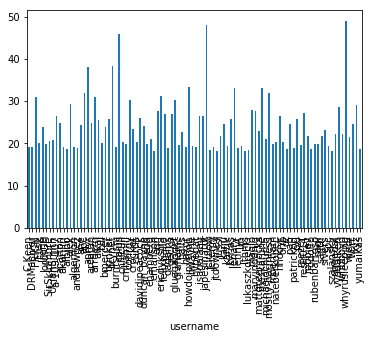

In [19]:
print(stdev2df)
stdev1df.plot(kind= 'bar')

username
apc                32.000000
aphyr              38.111111
brynet             38.250000
caius              46.000000
ericdykstra        31.333333
howdoipython       33.444444
japesinator        48.000000
lenary             33.000000
meskarune          33.222222
mostly-harmless    31.833333
whyrusleeping      49.000000
Name: engagement_score, dtype: float64


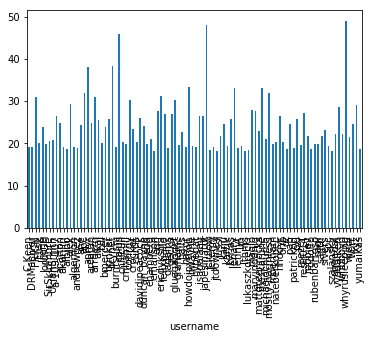

In [20]:
print(stdev3df)
stdev1df.plot(kind= 'bar')

In [21]:
df = og_df

In [22]:
df.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,...,vim,virtualization,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity,engagement_score
000yx1,2,https://lobste.rs/s/000yx1/analysis_soviet_smo...,2017-02-10 14:00:25,NaN,0,22,https://lobste.rs/s/000yx1,"['hardware', 'historical', 'science']",Analysis of Soviet smoke detector plutonium,22,...,0.0,0.0,0.0,0.0,0.0,14,4,2017,0.053848,24
001m4w,1,https://lobste.rs/s/001m4w/twitter_already_usi...,2014-11-17 13:20:20,NaN,0,3,https://lobste.rs/s/001m4w,"['networking', 'privacy']",Twitter Already Using Verizon's ID to Track Users,3,...,0.0,0.0,0.0,0.0,0.0,13,0,2014,0.249789,4
002cgs,2,https://lobste.rs/s/002cgs/resilience_ruby,2017-04-18 18:02:19,NaN,0,12,https://lobste.rs/s/002cgs,"['programming', 'ruby']",Resilience in Ruby,12,...,0.0,0.0,0.0,0.0,0.0,18,1,2017,0.102904,14
006hat,0,https://lobste.rs/s/006hat/hacking_linksys_wmb54g,2012-07-13 15:28:05,NaN,0,7,https://lobste.rs/s/006hat,"['hardware', 'security']",Hacking the Linksys WMB54G,7,...,0.0,0.0,0.0,0.0,0.0,15,4,2012,0.030448,7
00adts,1,https://lobste.rs/s/00adts/dying_art_mental_ma...,2016-01-13 10:10:04,NaN,0,7,https://lobste.rs/s/00adts,['math'],The Dying Art of Mental Math Tricks,7,...,0.0,0.0,0.0,0.0,0.0,10,2,2016,0.049901,8


In [23]:
import time
start = time.time()
"the code you want to test stays here"
df[['comment_text','comment_sentiment']] = df['comments_url'].apply(sentiment_comment_text)
end = time.time()
print(end - start)

12876.510597705841


In [24]:
df.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,...,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity,engagement_score,comment_text,comment_sentiment
000yx1,2,https://lobste.rs/s/000yx1/analysis_soviet_smo...,2017-02-10 14:00:25,NaN,0,22,https://lobste.rs/s/000yx1,"['hardware', 'historical', 'science']",Analysis of Soviet smoke detector plutonium,22,...,0.0,0.0,0.0,14,4,2017,0.053848,24,"[, , Too bad there isn’t a “crazy hobby” tag. ...",0.2500
001m4w,1,https://lobste.rs/s/001m4w/twitter_already_usi...,2014-11-17 13:20:20,NaN,0,3,https://lobste.rs/s/001m4w,"['networking', 'privacy']",Twitter Already Using Verizon's ID to Track Users,3,...,0.0,0.0,0.0,13,0,2014,0.249789,4,"[, , Why does a telecom need to target relevan...",0.0000
002cgs,2,https://lobste.rs/s/002cgs/resilience_ruby,2017-04-18 18:02:19,NaN,0,12,https://lobste.rs/s/002cgs,"['programming', 'ruby']",Resilience in Ruby,12,...,0.0,0.0,0.0,18,1,2017,0.102904,14,"[, , For sure, option types in Ruby would be n...",0.5023
006hat,0,https://lobste.rs/s/006hat/hacking_linksys_wmb54g,2012-07-13 15:28:05,NaN,0,7,https://lobste.rs/s/006hat,"['hardware', 'security']",Hacking the Linksys WMB54G,7,...,0.0,0.0,0.0,15,4,2012,0.030448,7,"[, ]",0.0000
00adts,1,https://lobste.rs/s/00adts/dying_art_mental_ma...,2016-01-13 10:10:04,NaN,0,7,https://lobste.rs/s/00adts,['math'],The Dying Art of Mental Math Tricks,7,...,0.0,0.0,0.0,10,2,2016,0.049901,8,"[, , They say the car saved the horse, in the ...",0.9053


In [25]:
df['engagement_score'].corr(df['comment_sentiment'])

0.42974368681631425

In [26]:
df.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,...,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity,engagement_score,comment_text,comment_sentiment
000yx1,2,https://lobste.rs/s/000yx1/analysis_soviet_smo...,2017-02-10 14:00:25,NaN,0,22,https://lobste.rs/s/000yx1,"['hardware', 'historical', 'science']",Analysis of Soviet smoke detector plutonium,22,...,0.0,0.0,0.0,14,4,2017,0.053848,24,"[, , Too bad there isn’t a “crazy hobby” tag. ...",0.2500
001m4w,1,https://lobste.rs/s/001m4w/twitter_already_usi...,2014-11-17 13:20:20,NaN,0,3,https://lobste.rs/s/001m4w,"['networking', 'privacy']",Twitter Already Using Verizon's ID to Track Users,3,...,0.0,0.0,0.0,13,0,2014,0.249789,4,"[, , Why does a telecom need to target relevan...",0.0000
002cgs,2,https://lobste.rs/s/002cgs/resilience_ruby,2017-04-18 18:02:19,NaN,0,12,https://lobste.rs/s/002cgs,"['programming', 'ruby']",Resilience in Ruby,12,...,0.0,0.0,0.0,18,1,2017,0.102904,14,"[, , For sure, option types in Ruby would be n...",0.5023
006hat,0,https://lobste.rs/s/006hat/hacking_linksys_wmb54g,2012-07-13 15:28:05,NaN,0,7,https://lobste.rs/s/006hat,"['hardware', 'security']",Hacking the Linksys WMB54G,7,...,0.0,0.0,0.0,15,4,2012,0.030448,7,"[, ]",0.0000
00adts,1,https://lobste.rs/s/00adts/dying_art_mental_ma...,2016-01-13 10:10:04,NaN,0,7,https://lobste.rs/s/00adts,['math'],The Dying Art of Mental Math Tricks,7,...,0.0,0.0,0.0,10,2,2016,0.049901,8,"[, , They say the car saved the horse, in the ...",0.9053


In [70]:
df.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,...,visualization,web,windows,created_hour,created_dow,created_year,scaled_title_popularity,engagement_score,comment_text,comment_sentiment
000yx1,2,https://lobste.rs/s/000yx1/analysis_soviet_smo...,2017-02-10 14:00:25,NaN,0,22,https://lobste.rs/s/000yx1,"['hardware', 'historical', 'science']",Analysis of Soviet smoke detector plutonium,22,...,0.0,0.0,0.0,14,4,2017,0.053848,24,"[, , Too bad there isn’t a “crazy hobby” tag. ...",0.2500
001m4w,1,https://lobste.rs/s/001m4w/twitter_already_usi...,2014-11-17 13:20:20,NaN,0,3,https://lobste.rs/s/001m4w,"['networking', 'privacy']",Twitter Already Using Verizon's ID to Track Users,3,...,0.0,0.0,0.0,13,0,2014,0.249789,4,"[, , Why does a telecom need to target relevan...",0.0000
002cgs,2,https://lobste.rs/s/002cgs/resilience_ruby,2017-04-18 18:02:19,NaN,0,12,https://lobste.rs/s/002cgs,"['programming', 'ruby']",Resilience in Ruby,12,...,0.0,0.0,0.0,18,1,2017,0.102904,14,"[, , For sure, option types in Ruby would be n...",0.5023
006hat,0,https://lobste.rs/s/006hat/hacking_linksys_wmb54g,2012-07-13 15:28:05,NaN,0,7,https://lobste.rs/s/006hat,"['hardware', 'security']",Hacking the Linksys WMB54G,7,...,0.0,0.0,0.0,15,4,2012,0.030448,7,"[, ]",0.0000
00adts,1,https://lobste.rs/s/00adts/dying_art_mental_ma...,2016-01-13 10:10:04,NaN,0,7,https://lobste.rs/s/00adts,['math'],The Dying Art of Mental Math Tricks,7,...,0.0,0.0,0.0,10,2,2016,0.049901,8,"[, , They say the car saved the horse, in the ...",0.9053


In [35]:
og_df = df

In [39]:
#grouping by comment sentiment shows those who have produces the mose positive comments on the site
total_comment_sentiment = df.groupby('username')['comment_sentiment'].mean()

In [38]:
print(total_comment_sentiment)

In [31]:
df['comment_sentiment'].count()

28801

In [36]:
df['comment_sentiment'] = df['comment_sentiment'].apply(pd.to_numeric)

In [40]:
#Find average commentiment per post per username if they have posted 10 or more times
avg_postsent_by_user = total_comment_sentiment
avg_postsent_by_user = avg_postsent_by_user.dropna()

In [41]:
#find the standard deviation of the comment sentiment
stdev_comsent = stat.stdev(avg_postsent_by_user)
print(stdev_comsent)

0.3452474684295224


In [42]:
#mean of the comment sentiment
mean_comsent = stat.mean(avg_postsent_by_user)
print(mean_comsent)

0.28929492633576687


In [71]:
df=avg_postsent_by_user

In [72]:
#find comment sentiment standard deviation levels
one_comsent_stdev = stdev_comsent +mean_comsent
two_comsent_stdev = (stdev_comsent*2) + mean_comsent
three_comsent_stdev = (stdev_comsent*3) + mean_comsent
stdev1dfcs = df.drop(df[df < one_comsent_stdev].index)
stdev2dfcs = df.drop(df[df < two_comsent_stdev].index)
stdev3dfcs = df.drop(df[df < three_comsent_stdev].index)

In [73]:
print(one_comsent_stdev)

0.6345423947652893


In [68]:
stdev1dfcs = df.drop(df[df < one_comsent_stdev].index)

In [74]:
print(stdev1dfcs)

username
0x2ba22e11            0.727500
Adir                  0.929050
Alodium               0.999300
AutomaticHourglass    0.854800
Boojum                0.795100
Cale                  0.921400
Charlotteis           0.865300
Clex                  0.952200
DyslexicAtheist       0.712550
EamonLeonard          0.999300
EduardoBautista       0.711225
Evild                 0.949500
Frej                  0.997900
Hates_                0.680800
Irene                 0.703956
Jalada                0.900100
Leonidas              0.962500
Luke                  0.992450
MSch                  0.805700
Manishearth           0.687967
Mathiasdm             0.860800
Mrat                  0.999600
Pushups               0.980300
Rickenharp            0.986000
Shapr                 0.658100
Somebody              0.941767
The-Compiler          0.997400
The_Kulk              0.962700
Treffynnon            0.834200
VictorBjelkholm       0.874400
                        ...   
vendion               0.990400

In [44]:
#total engagement score per username
print(total_engagement_score_by_usn)

username
0                       75
0x2ba22e11               6
0xfg                     4
1amzave                 46
355E3B                2130
4ad                     78
ANTStorm                 4
AdamGibbins             74
Adir                     8
AlexGilleran             6
AliasIO                 17
Alodium                  2
AmirRachum              68
AntonioMeireles          3
Aranje                   2
Arrgh                   16
Astyan                   3
AutomaticHourglass       8
Axman6                 117
Benedmunds               1
BonacaTalk               2
Bonbonia                 3
Boojum                   9
BruceM                2579
Bystroushaak            93
C-Keen                 210
CS                      13
Cale                     6
Caustic                  7
Charlotteis              1
                      ... 
yvonne-chen             16
z3bra                   29
za_creature              2
zacbrown               289
zachwill                 4
zack               

In [45]:
#total comment sentitment per username
print(total_comment_sentiment)

username
0                     0.283900
0x2ba22e11            0.727500
0xfg                  0.000000
1amzave               0.231675
355E3B                0.266660
4ad                   0.434567
ANTStorm              0.000000
AdamGibbins          -0.003200
Adir                  0.929050
AlexGilleran          0.000000
AliasIO               0.413750
Alodium               0.999300
AmirRachum            0.083525
AntonioMeireles       0.000000
Aranje                0.361200
Arrgh                 0.361200
Astyan                0.000000
AutomaticHourglass    0.854800
Axman6                0.265014
Benedmunds            0.000000
BonacaTalk            0.000000
Bonbonia              0.000000
Boojum                0.795100
BruceM                0.335520
Bystroushaak          0.327567
C-Keen                0.546536
CS                    0.034233
Cale                  0.921400
Caustic               0.525600
Charlotteis           0.865300
                        ...   
yvonne-chen           0.991500

In [46]:
#number of posts by usernmae
print(total_posts_by_usn)

username
0                     5
1amzave               8
355E3B              160
AdamGibbins          11
AmirRachum           12
Axman6                7
BruceM              161
Bystroushaak          9
C-Keen               11
ChrisShort           15
Curiositry           25
DRMacIver            53
DanTup               23
Dawny33             104
DocSavage             8
Don_Pellegrino        7
DrM                  26
Ecto5                 7
EthanHeilman          8
FRIGN                 5
Flisk                 6
FooBarWidget          5
GMW                   5
Gargi                 6
GeoffWozniak         36
InakaESI              6
InkyHarmonics         7
Irene                 9
JeffreyBaird          6
JeremyMorgan         87
                   ... 
wally                67
weakforce             9
wetzler               8
whbboyd              22
whyrusleeping         5
wiedi                12
wikimatze             8
wildlyinaccurate      5
wje                   5
wmoxam               10
worr   

In [47]:
#average post engagement per username
print(avg_engagement_by_user)

username
0                   15.000000
1amzave              5.750000
355E3B              13.312500
AdamGibbins          6.727273
AmirRachum           5.666667
Axman6              16.714286
BruceM              16.018634
Bystroushaak        10.333333
C-Keen              19.090909
ChrisShort          13.200000
Curiositry          11.200000
DRMacIver           19.056604
DanTup              12.173913
Dawny33              8.817308
DocSavage            8.500000
Don_Pellegrino       9.571429
DrM                 11.769231
Ecto5                4.428571
EthanHeilman         7.750000
FRIGN               31.000000
Flisk               20.000000
FooBarWidget         3.800000
GMW                 10.000000
Gargi                5.500000
GeoffWozniak        15.305556
InakaESI             2.000000
InkyHarmonics        4.714286
Irene               23.777778
JeffreyBaird         5.166667
JeremyMorgan         6.735632
                      ...    
wally               10.970149
weakforce            4.777778
w

In [48]:
#average post sentiment by user for use in determining posters that create most positive community reaction
print(avg_postsent_by_user)

username
0                     0.283900
0x2ba22e11            0.727500
0xfg                  0.000000
1amzave               0.231675
355E3B                0.266660
4ad                   0.434567
ANTStorm              0.000000
AdamGibbins          -0.003200
Adir                  0.929050
AlexGilleran          0.000000
AliasIO               0.413750
Alodium               0.999300
AmirRachum            0.083525
AntonioMeireles       0.000000
Aranje                0.361200
Arrgh                 0.361200
Astyan                0.000000
AutomaticHourglass    0.854800
Axman6                0.265014
Benedmunds            0.000000
BonacaTalk            0.000000
Bonbonia              0.000000
Boojum                0.795100
BruceM                0.335520
Bystroushaak          0.327567
C-Keen                0.546536
CS                    0.034233
Cale                  0.921400
Caustic               0.525600
Charlotteis           0.865300
                        ...   
yvonne-chen           0.991500

In [49]:
#Usernames 1 or more standard deviations from the average post engagement score mean
print(stdev1df)

username
C-Keen             19.090909
DRMacIver          19.056604
FRIGN              31.000000
Flisk              20.000000
Irene              23.777778
JordiGH            19.904762
SirSkidmore        20.500000
UkiahSmith         20.777778
a-109-107          26.500000
acatton            24.800000
akurilin           19.142857
albino             18.600000
alek               29.400000
algernon           19.260870
andrewnez          18.916667
ane                24.250000
apc                32.000000
aphyr              38.111111
arcatan            24.933333
arrdem             30.909091
awal               25.631579
bill               20.166667
bmercer            23.888889
brinker            25.705882
brynet             38.250000
burntsushi         19.090909
caius              46.000000
chilicuil          20.333333
cmhamill           19.875000
conroy             30.222222
                     ...    
mattgreenrocks     23.000000
meskarune          33.222222
michaelochurch     21.086207
mostl

In [50]:
#Usernames 2 or more standard deviations from the average post engagement score mean
print(stdev2df)

username
FRIGN              31.000000
a-109-107          26.500000
acatton            24.800000
alek               29.400000
apc                32.000000
aphyr              38.111111
arcatan            24.933333
arrdem             30.909091
awal               25.631579
brinker            25.705882
brynet             38.250000
caius              46.000000
conroy             30.222222
davidjpeacock      26.125000
enn                27.666667
ericdykstra        31.333333
felixgallo         27.000000
gecko              27.000000
gluegadget         30.200000
howdoipython       33.444444
isagalaev          26.400000
iv                 26.428571
japesinator        48.000000
kaiju              24.500000
kyrias             25.714286
lenary             33.000000
maqio              27.916667
marvindanig        27.625000
meskarune          33.222222
mostly-harmless    31.833333
nhooyr             26.400000
pab                24.666667
pxi                25.833333
resir014           27.125000
vyoda

In [51]:
#Usernames 3 or more standard deviations from the average post engagement score mean
print(stdev3df)

username
apc                32.000000
aphyr              38.111111
brynet             38.250000
caius              46.000000
ericdykstra        31.333333
howdoipython       33.444444
japesinator        48.000000
lenary             33.000000
meskarune          33.222222
mostly-harmless    31.833333
whyrusleeping      49.000000
Name: engagement_score, dtype: float64


In [78]:
#Usernames 1 or more standard deviations from the average post comment sentiment mean
print(stdev1dfcs)

username
0x2ba22e11            0.727500
Adir                  0.929050
Alodium               0.999300
AutomaticHourglass    0.854800
Boojum                0.795100
Cale                  0.921400
Charlotteis           0.865300
Clex                  0.952200
DyslexicAtheist       0.712550
EamonLeonard          0.999300
EduardoBautista       0.711225
Evild                 0.949500
Frej                  0.997900
Hates_                0.680800
Irene                 0.703956
Jalada                0.900100
Leonidas              0.962500
Luke                  0.992450
MSch                  0.805700
Manishearth           0.687967
Mathiasdm             0.860800
Mrat                  0.999600
Pushups               0.980300
Rickenharp            0.986000
Shapr                 0.658100
Somebody              0.941767
The-Compiler          0.997400
The_Kulk              0.962700
Treffynnon            0.834200
VictorBjelkholm       0.874400
                        ...   
vendion               0.990400

In [79]:
#Usernames 2 or more standard deviations from the average post comment sentiment mean
print(stdev2dfcs)

username
Alodium            0.99930
EamonLeonard       0.99930
Frej               0.99790
Luke               0.99245
Mrat               0.99960
Pushups            0.98030
Rickenharp         0.98600
The-Compiler       0.99740
Widdershin         0.99950
ZtF                0.98730
aminb              0.99935
anarcat            0.98520
andrewrk           0.99890
andrewshadura      0.99880
anouk              0.99800
basus              0.99230
batasrki           0.99890
bcrescimanno       0.98890
benaiah            0.99190
benoliver999       0.98290
binsearch          0.99800
bnewbold           0.98390
brianmichel        0.99400
checkyoursix       0.99870
code               0.98360
dan                0.99390
danielzarick       0.98020
danso              0.99850
dervondenbergen    0.99590
di                 0.99170
                    ...   
nicferrier         0.98350
noqqe              0.99880
ohmfox             0.99030
olegkovalov        0.99405
overtowed          0.99630
ozan               

In [80]:
#Usernames 1 or more standard deviations from the average post comment sentiment mean
print(stdev3dfcs)

Series([], Name: comment_sentiment, dtype: float64)


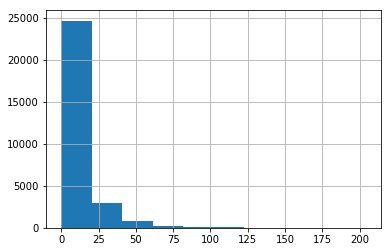

In [55]:
#engagement score for all posts
df['engagement_score'].hist()

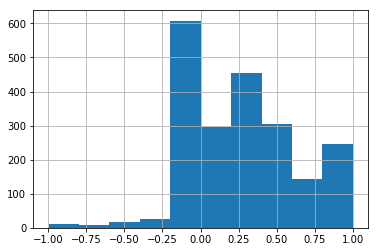

In [56]:
#total comment sentiment by username
total_comment_sentiment.hist()

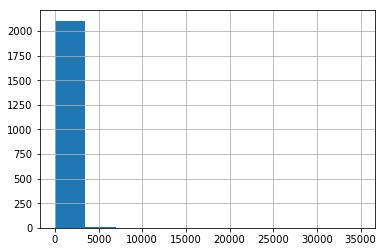

In [57]:
#total engagement score by username 
total_engagement_score_by_usn.hist()

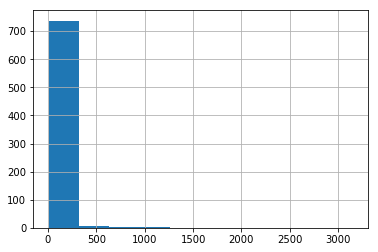

In [58]:
#total posts in dataset by username
total_posts_by_usn.hist()

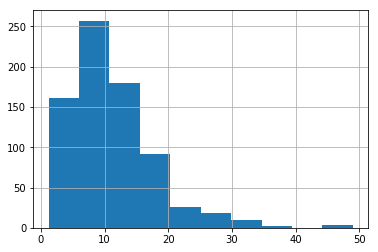

In [59]:
#average post engagement score by username
avg_engagement_by_user.hist()

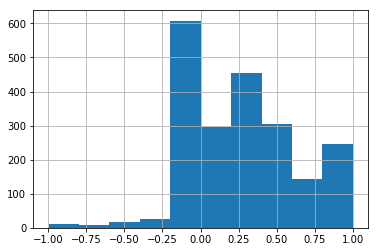

In [60]:
#average post comment sentiment by username
avg_postsent_by_user.hist()

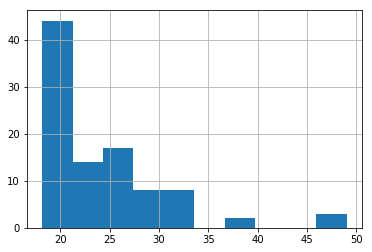

In [61]:
#average post engagement scores by username 1 or more standard deviations above the mean
stdev1df.hist()

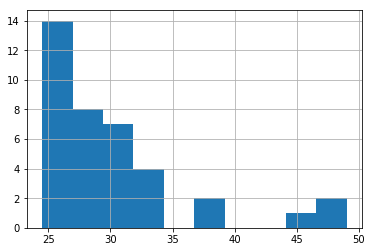

In [62]:
#average post engagement scores by username 2 or more standard deviations above the mean
stdev2df.hist()

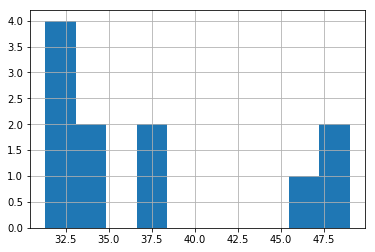

In [63]:
#average post engagement scores by username 3 or more standard deviations above the mean
stdev3df.hist()

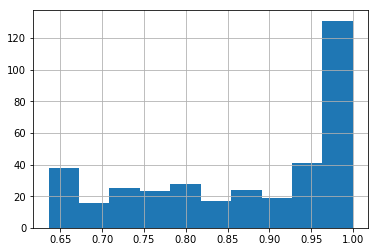

In [75]:
#average post comment sentiment by username 1 or more standard deviations above the mean
stdev1dfcs.hist()

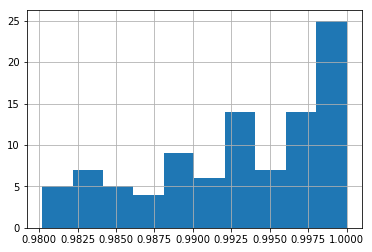

In [76]:
#average post comment sentiment by username 2 or more standard deviations above the mean
stdev2dfcs.hist()

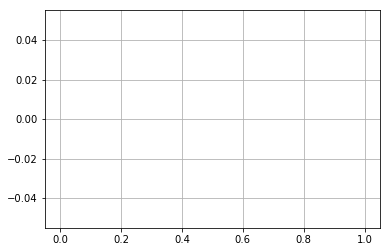

In [77]:
#average post comment sentiment by username 3 or more standard deviations above the mean
stdev3dfcs.hist()